## Observations and Insights 

In [162]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
# Display the data table for preview
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [163]:
# Checking the number of mice.
mouse_count = merge_table["Mouse ID"].nunique()
mouse_count

249

In [164]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_table.loc[merge_table.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [165]:
# Optional: Get all the data for the duplicate mouse ID. 
Mouse_ID = merge_table.set_index('Mouse ID')
g989 = Mouse_ID.loc['g989',:]
g989


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [166]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_table.loc[merge_table["Mouse ID"] !="g989",:]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [167]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_data["Mouse ID"].nunique()
mouse_count

248

## Summary Statistics

In [168]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_regimen = clean_data.groupby(["Drug Regimen"])
regimen_mean = drug_regimen["Tumor Volume (mm3)"].mean()
regimen_median = drug_regimen["Tumor Volume (mm3)"].median()
regimen_var = drug_regimen["Tumor Volume (mm3)"].var()
regimen_std =  drug_regimen["Tumor Volume (mm3)"].std()
regimen_SEM = drug_regimen["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Varience": regimen_var, "STD": regimen_std, "SEM": regimen_SEM})
summary_stats

,Mean,Median,Varience,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [169]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats=drug_regimen.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

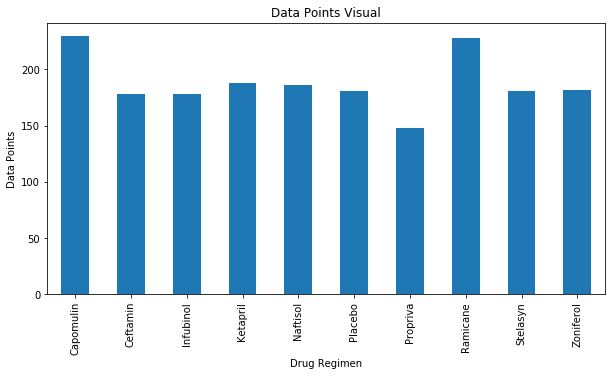

In [170]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

regimen_data_pts = drug_regimen.count()["Mouse ID"]
regimen_data_pts.plot(kind="bar", figsize=(10,5))

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.show()


Text(0, 0.5, 'Data Points')

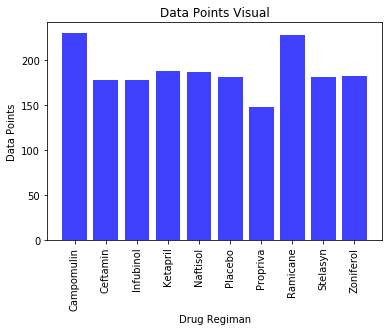

In [183]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
users = regimen_data_pts

x_axis = np.arange(len(regimen_data_pts))

tick_locations = [value for value in x_axis]

plt.bar(x_axis, users, color='b', alpha = .75, align='center')

plt.xticks(tick_locations, ["Campomulin", "Ceftamin", "Infubinol", "Ketapril", 'Naftisol', "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical')

plt.title("Data Points Visual")
plt.xlabel("Drug Regiman")
plt.ylabel("Data Points")

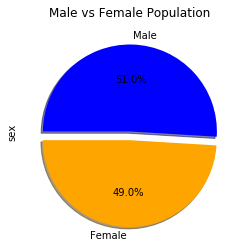

In [208]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_data.groupby('Sex')
gender_count = gender_group["Sex"].value_counts()

labels = 'Female', 'Male'
colors = ["orange", "blue"]
plt.pie(gender_count, explode=(0.1,0), labels=labels, colors=colors , autopct="%1.1f%%", shadow= True, startangle = 180)
plt.title("Male vs Female Population")
plt.ylabel("sex")

plt.show()


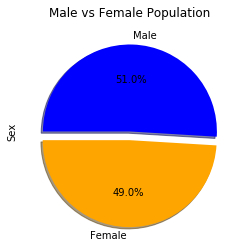

In [214]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count.plot.pie(y=gender_count, explode=(0.1,0), labels = labels, colors= colors, autopct="%1.1f%%", shadow= True, startangle=180)

plt.title("Male vs Female Population")
plt.show()


## Quartiles, Outliers and Boxplots

In [216]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
best_regimens= clean_data.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
best_regimens_merge = pd.merge(clean_data, best_regimens, how= 'right', on= ['Mouse ID', 'Timepoint'])
mouse_vol = best_regimens_merge[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin", :]
ramicane_df = clean_data.loc[clean_data['Drug Regimen'] == "Ramicane", :]
indubinol_df = clean_data.loc[clean_data['Drug Regimen'] == "Indubinol", :]
ceftamin_df = clean_data.loc[clean_data['Drug Regimen'] == "Ceftamin", :]

In [223]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
 #loop
for drug in drugs:
     tumor_volume = mouse_vol.loc[mouse_vol["Drug Regimen"] == drug, 'Tumor Volume (mm3)']   

     vol_data.append(tumor_volume)

     quartiles = tumor_volume.quantile([.25,.5,.75])
     lowerq = quartiles[0.25]
     upperq = quartiles[0.75]
     IQR = round(upperq-lowerq, 2)
     lower_bound = lowerq -(1.5*IQR)
     upper_bound = upperq + (1.5*IQR)

     print(f"The lower quartile of Tumor Volume for {drug} is: {lowerq}")
     print(f"The upper quartile of Tumor Volume for {drug} is: {upperq}")
     print(f"The interquartile range of Tumor Volume for {drug} is: {IQR}")
     print(f"The the median of Tumor Volume for {drug} is: {quartiles[0.5]} ")
     print(f"Values below {lower_bound} could be outliers.")
     print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Tumor Volume for Capomulin is: 32.37735684
The upper quartile of Tumor Volume for Capomulin is: 40.1592203
The interquartile range of Tumor Volume for Capomulin is: 7.78
The the median of Tumor Volume for Capomulin is: 38.125164399999996 
Values below 20.707356839999996 could be outliers.
Values above 51.8292203 could be outliers.
The lower quartile of Tumor Volume for Ramicane is: 31.56046955
The upper quartile of Tumor Volume for Ramicane is: 40.65900627
The interquartile range of Tumor Volume for Ramicane is: 9.1
The the median of Tumor Volume for Ramicane is: 36.56165229 
Values below 17.910469550000002 could be outliers.
Values above 54.30900627 could be outliers.
The lower quartile of Tumor Volume for Infubinol is: 54.04860769
The upper quartile of Tumor Volume for Infubinol is: 65.52574285
The interquartile range of Tumor Volume for Infubinol is: 11.48
The the median of Tumor Volume for Infubinol is: 60.16518046 
Values below 36.82860769 could be outliers.


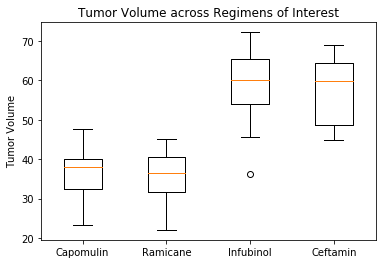

In [228]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

plt.boxplot(vol_data, labels=labels)
plt.title("Tumor Volume across Regimens of Interest")
plt.ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

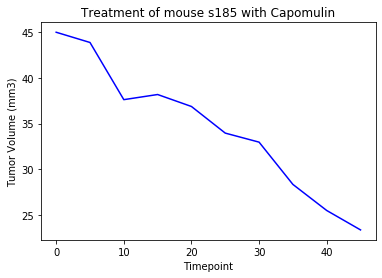

In [236]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185 =clean_data.loc[clean_data["Mouse ID"] == "s185"]

plt.plot(s185['Timepoint'], s185['Tumor Volume (mm3)'], color = 'b')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Treatment of mouse s185 with Capomulin')
plt.show()

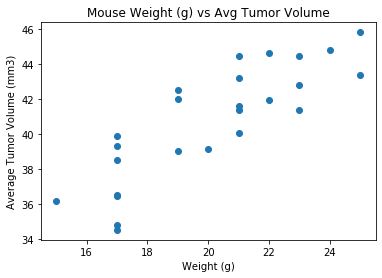

In [238]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight (g) vs Avg Tumor Volume")

plt.show()

## Correlation and Regression

In [241]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])[0],2)
Linregress = st.linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
Linregress

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

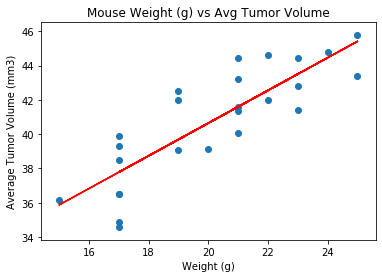

In [242]:
slope = 0.9544396890241045
intercept = 21.552160532685015
regression_line = capomulin_avg["Weight (g)"]*slope+intercept
plt.plot(capomulin_avg['Weight (g)'], regression_line, color="red")
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight (g) vs Avg Tumor Volume")

plt.show()